In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploring UK Biobank data and relating it to mean activity

In [2]:
from accel.read_data import load_data

In [3]:
# Path to dataset
PATH = '/cdtshared/wearables/students/group5/'

# Features from biobank
raw_data = load_data(PATH+'reduced-cohort.csv') # can also see biobank-encoded-cohort
# raw_data = load_data(PATH+'biobank-encoded-cohort.csv') # can also see biobank-encoded-cohort

In [4]:
raw_data.shape

(99413, 70)

There are quite a few features in this data-set(70 = 69 features + 1 reponse)! We have 99413 observations in this data-set, though we still need to check for missingness. The response we are looking at is `acc.overall.avg` which takes the mean of the accelerometer data. The accelerometer data is time series data which measures the acceleration experienced by the device in x, y and z directions relative to the device which is worn on the participant's wrist. 

We preview the first few rows below:

In [5]:
raw_data.head()

,Unnamed: 0,acc.overall.avg,Participant ID,MET minutes per week for vigorous activity | Instance 0,Tea intake | Instance 0,Sex,Type of accommodation lived in | Instance 0,Duration of walks | Instance 0,Frequency of stair climbing in last 4 weeks | Instance 0,Getting up in morning | Instance 0,...,Attendance/disability/mobility allowance | Instance 0,Ethnic background | Instance 0,Crime score,Education score,Employment score,Health score,Housing score,Income score,Index of Multiple Deprivation,Living environment
0,0,24.20244,1000052,960.0,4,Female,A house or bungalow,40,1-5 times a day,Fairly easy,...,None of the above,British,-0.55,23.89,0.12,-0.33,6.90,0.19,18.76,8.70
1,1,31.56829,1000133,320.0,8,Male,A house or bungalow,30,11-15 times a day,Fairly easy,...,None of the above,British,1.46,22.17,0.08,0.43,28.64,0.09,22.82,11.35
2,2,31.81727,1000209,1920.0,2,Male,A house or bungalow,60,16-20 times a day,Fairly easy,...,None of the above,British,-0.70,10.13,0.08,0.16,22.16,0.04,10.10,1.64
3,3,23.68884,1000297,0.0,7,Male,A house or bungalow,30,6-10 times a day,Very easy,...,None of the above,British,0.96,7.07,0.11,0.23,32.34,0.17,27.22,42.53
4,4,18.83354,1000384,3600.0,2,Male,A house or bungalow,20,11-15 times a day,Very easy,...,None of the above,Any other white background,-1.18,1.49,0.06,-0.32,5.69,0.04,4.60,5.79


## Defining features
We define the categorical and numerical features and get rid of columns such as the participant ID and the index. Upon exploring the categorical and numerical features, it appears that it might be worth further defining genres of similar features, and that it might not be a good idea to include all variables without reflecting on their encoding and meaning further. To what extent is our data-set representative and which categories might be under-represented in our data?

In [6]:
set(raw_data.columns)

{'Above moderate/vigorous recommendation | Instance 0',
 'Above moderate/vigorous/walking recommendation | Instance 0',
 'Age at recruitment',
 'Age started wearing glasses or contact lenses | Instance 0',
 'Alcohol drinker status | Instance 0',
 'Alcohol intake frequency. | Instance 0',
 'Attendance/disability/mobility allowance | Instance 0',
 'Average total household income before tax | Instance 0',
 'Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 0',
 'Body mass index (BMI) | Instance 0',
 'Breastfed as a baby | Instance 0',
 'Cancer diagnosed by doctor | Instance 0',
 'Chest pain or discomfort | Instance 0',
 'Cooked vegetable intake | Instance 0',
 'Crime score',
 'Diabetes diagnosed by doctor | Instance 0',
 'Duration of walks | Instance 0',
 'Education score',
 'Employment score',
 'Ethnic background | Instance 0',
 'Exposure to tobacco smoke at home | Instance 0',
 'Exposure to tobacco smoke outside home | Instance 0',


In [7]:
features_of_interest = list(set(raw_data.columns) - set(['Unnamed: 0', 'Participant ID', 'acc.overall.avg']))

# identify the categorical features
categorical_features = []
for col in raw_data:
    if raw_data[col].dtype=='object':
        categorical_features.append(col)
        
# indentify the numerical features
numeric_features = list(set(features_of_interest) - set(categorical_features))

In [8]:
set(categorical_features)

{'Above moderate/vigorous recommendation | Instance 0',
 'Above moderate/vigorous/walking recommendation | Instance 0',
 'Age started wearing glasses or contact lenses | Instance 0',
 'Alcohol drinker status | Instance 0',
 'Alcohol intake frequency. | Instance 0',
 'Attendance/disability/mobility allowance | Instance 0',
 'Average total household income before tax | Instance 0',
 'Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 0',
 'Breastfed as a baby | Instance 0',
 'Cancer diagnosed by doctor | Instance 0',
 'Chest pain or discomfort | Instance 0',
 'Cooked vegetable intake | Instance 0',
 'Diabetes diagnosed by doctor | Instance 0',
 'Duration of walks | Instance 0',
 'Ethnic background | Instance 0',
 'Exposure to tobacco smoke at home | Instance 0',
 'Exposure to tobacco smoke outside home | Instance 0',
 'Fractured/broken bones in last 5 years | Instance 0',
 'Frequency of stair climbing in last 4 weeks | Instance 0',
 '

In [9]:
set(numeric_features)

{'Age at recruitment',
 'Body mass index (BMI) | Instance 0',
 'Crime score',
 'Education score',
 'Employment score',
 'Health score',
 'Housing score',
 'Income score',
 'Index of Multiple Deprivation',
 'Living environment',
 'MET minutes per week for moderate activity | Instance 0',
 'MET minutes per week for vigorous activity | Instance 0',
 'MET minutes per week for walking | Instance 0',
 'Summed days activity | Instance 0',
 'Townsend deprivation index at recruitment'}

## Thoughts!

It seems that some of the categorical variables, such as `Time spend outdoors in summer`, might be numerical in nature and some of the numerical variables, such as `living environment`, might be categorical in nature. 

There are also some variables whose relevance are note immediately obvious to predicting physical activity such as:
- How are people in household related to participant
- Age started wearing glasses or contact lenses | Instance 0 
- Mouth/teeth dental problems | Instance 0'

It might make sense to manually group variables into categories such as:

Categorical prefeaced with *C*, 
Numerical prefaced with *N* 
(! denotes items which should be looked into further): 

- emotional
    - C Irritability | Instance 0
    - C Miserableness | Instance 0
    - C Mood swings | Instance 0
    - C Sensitivity / hurt feelings | Instance 0
    - C Worrier / anxious feelings | Instance 0
- dietary 
    - C! Cooked vegetable intake | Instance 0
    - C! Fresh fruit intake | Instance 0
    - C! Oily fish intake | Instance 0
    - C Salad / raw vegetable intake | Instance 0
    - C Salt added to food | Instance 0
    - C! Tea intake | Instance 0
    - C! Water intake | Instance 0
- socio
    - C! Average total household income before tax | Instance 0
    - C Ethnic background | Instance 0
    - C! Number of vehicles in household | Instance 0
    - C Qualifications | Instance 0
    - C Sex
    - C Type of accommodation lived in | Instance 0
    - N Age at recruitment
    - N Crime score
    - N Education score
    - N Employment score
    - N Housing score
    - N Income score
    - N Index of Multiple Deprivation
    - N! Living environment
    - N Townsend deprivation index at recruitment
- physical
    - C Above moderate/vigorous recommendation | Instance 0
    - C Above moderate/vigorous/walking recommendation | Instance 0
    - C Attendance/disability/mobility allowance | Instance 0
    - C! Duration of walks | Instance 0
    - C! Frequency of stair climbing in last 4 weeks | Instance 0
    - C! Frequency of tiredness / lethargy in last 2 weeks | Instance 0
    - C IPAQ activity group | Instance 0
    - N Body mass index (BMI) | Instance 0
    - N MET minutes per week for moderate activity | Instance 0
    - N MET minutes per week for vigorous activity | Instance 0
    - N MET minutes per week for walking | Instance 0
    - N Summed days activity | Instance 0
- lifestyle
    - C Alcohol drinker status | Instance 0
    - C Alcohol intake frequency. | Instance 0
    - C Exposure to tobacco smoke at home | Instance 0
    - C Exposure to tobacco smoke outside home | Instance 0
    - C Length of mobile phone use | Instance 0
    - C! Sleep duration | Instance 0
    - C Smoking status | Instance 0
    - C! Time spend outdoors in summer | Instance 0 
    - C! Time spent outdoors in winter | Instance 0
    - C! Time spent using computer | Instance 0
    - C! Time spent watching television (TV) | Instance 0
    - C! Weekly usage of mobile phone in last 3 months | Instance 0
- health
    - C Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 0
    - C Cancer diagnosed by doctor | Instance 0
    - C Chest pain or discomfort | Instance 0
    - C Diabetes diagnosed by doctor | Instance 0
    - C Fractured/broken bones in last 5 years | Instance 0
    - C Mouth/teeth dental problems | Instance 0
    - C Other serious medical condition/disability diagnosed by doctor | Instance 0
    - C Overall health rating | Instance 0
    - C Vascular/heart problems diagnosed by doctor | Instance 0
    - N Health score
- other
    - C Age started wearing glasses or contact lenses | Instance 0
    - C Breastfed as a baby | Instance 0
    - C Getting up in morning | Instance 0
    - C How are people in household related to participant | Instance 0
    - C! Number in household | Instance 0
    - C Wears glasses or contact lenses | Instance 0

Also, which of these variables were included in the previous study? We should also make it easy to load those variables. I envision having a function which quickly selects variables based on categories.

## Selecting all features

In [10]:
X = raw_data[features_of_interest]
y = raw_data['acc.overall.avg']

## Missingness
There appears to be a large amount of missing data. We want to check how much is missing in each column.

In [11]:
n_missing = X.isna().sum().to_numpy() # get number of missing values per column
print("Number of rows with missing data: ", X.shape[0] - X.dropna().shape[0]) 

Number of rows with missing data:  51522


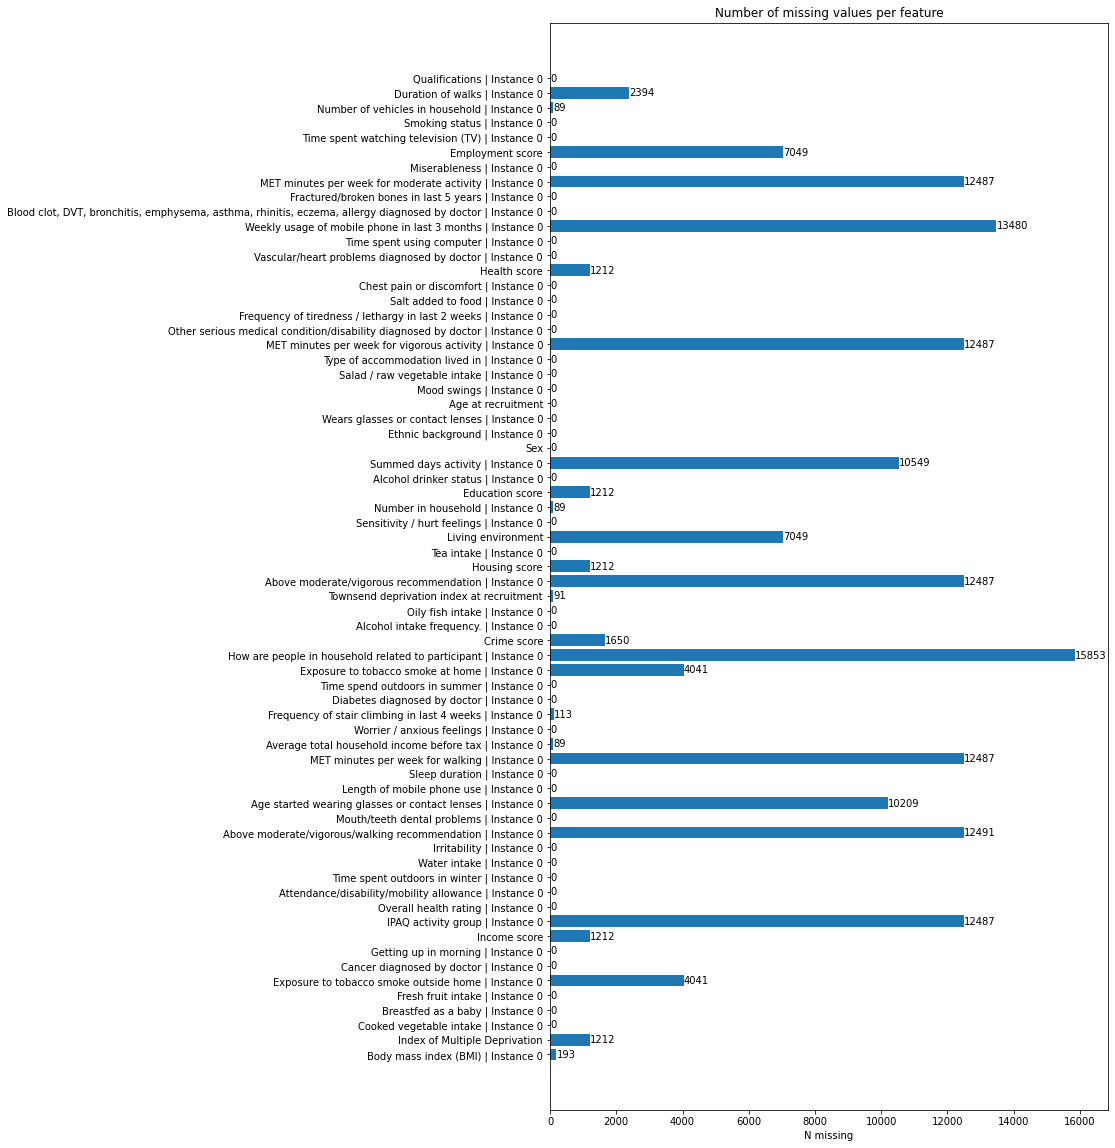

In [12]:
fig, ax = plt.subplots(figsize=(10,20))

col_names = list(X.columns)
y_pos = np.arange(len(col_names))

hbars = ax.barh(y_pos, n_missing, align='center')
ax.set_yticks(y_pos, labels=col_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('N missing')
ax.set_title('Number of missing values per feature')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%d')
ax.set_xlim(right=np.max(n_missing)+1000)  # adjust xlim to fit labels

plt.show()


## Numeric vs. categorical variables 
We select a subset of the data. Since some of the variables are categorical and others are numerical in nature, we need to deal with them slightly differently. To get a numeric encoding for categorical variables, we can use one-hot encoding. There are also many missing variables so we do mean and mode imputation. 

In [13]:
from accel.read_data import select_sets
from accel.constants import DEMO, PHYSICAL

In [14]:
other_factors = {
    'Alcohol drinker status | Instance 0',
    'Smoking status | Instance 0',
    'Time spend outdoors in summer | Instance 0',
    'Time spent outdoors in winter | Instance 0',
    'Health score'
}

In [15]:
X = select_sets(raw_data, DEMO, PHYSICAL, other_factors)

In [16]:
# checking the encoding
for col in X:
    print(col, X[col].dtype)

Above moderate/vigorous/walking recommendation | Instance 0 object
Ethnic background | Instance 0 object
MET minutes per week for moderate activity | Instance 0 float64
Above moderate/vigorous recommendation | Instance 0 object
Sex object
MET minutes per week for vigorous activity | Instance 0 float64
Summed days activity | Instance 0 float64
Time spend outdoors in summer | Instance 0 object
Alcohol drinker status | Instance 0 object
Time spent outdoors in winter | Instance 0 object
Age at recruitment int64
Frequency of stair climbing in last 4 weeks | Instance 0 object
Health score float64
Duration of walks | Instance 0 object
MET minutes per week for walking | Instance 0 float64
Smoking status | Instance 0 object
IPAQ activity group | Instance 0 object
Body mass index (BMI) | Instance 0 float64


As we see, a few variables have been encoded in ways we need to be careful of. These are:
- Duration of walks | Instance 0 *object* - this should just be the minutes spent walking (i.e. a number)
- Time spent outdoors in winter | Instance 0 object - this and below should just be numbers (hours)
- Time spend outdoors in summer | Instance 0 object

In [17]:
X["Duration of walks | Instance 0"].unique()

array(['40', '30', '60', '20', '120', '180', nan, '240', '15', '10', '75',
       '90', '300', '100', '45', '80', 'Do not know', '25', '35', '360',
       '50', '70', '5', '99', '480', '400', '220', '720', '150', '170',
       '65', '12', '160', '210', '130', '55', '600', '11', '200', '500',
       '36', '250', '8', '42', '18', '6', '85', '59', '49', '140', '420',
       '22', '1000', 'Prefer not to answer', '1', '110', '105', '3',
       '350', '48', '112', '72', '2', '450', '7', '260', '14', '182',
       '310', '280', '0', '270', '190', '880', '13', '530', '4', '800',
       '28', '540', '123', '9', '145', '84', '33', '17', '430', '16',
       '24', '58', '1200', '125', '510', '320', '520', '66', '19', '135',
       '550', '840', '315', '560', '46', '650', '27', '340', '95', '620',
       '453', '265', '900', '235', '700', '118', '1080', '54', '950',
       '62', '37', '660', '230', '53', '960', '380', '750', '330', '175',
       '69', '23', '325', '44', '275', '121', '144', '460', 

In [18]:
X["Duration of walks | Instance 0"].replace({"Do not know" : np.nan, "Prefer not to answer" : np.nan},  inplace=True)
X["Duration of walks | Instance 0"] = pd.to_numeric(X["Duration of walks | Instance 0"])

/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/ipykernel_17981/919958914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Duration of walks | Instance 0"] = pd.to_numeric(X["Duration of walks | Instance 0"])


In [19]:
X["Time spend outdoors in summer | Instance 0"].unique()

array(['8', '6', '1', '3', '2', '10', '5', '4', 'Less than an hour a day',
       'Do not know', '9', '12', '7', '16', '0', '14', '13', '15', '24',
       '18', '11', '20', 'Prefer not to answer', '22', '21', '19'],
      dtype=object)

In [20]:
X["Time spend outdoors in summer | Instance 0"].replace({"Less than an hour a day" : 0, "Prefer not to answer" : np.nan, "Do not know" : np.nan},  inplace=True)
X["Time spend outdoors in summer | Instance 0"] = pd.to_numeric(X["Time spend outdoors in summer | Instance 0"])

/tmp/ipykernel_17981/2834375543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Time spend outdoors in summer | Instance 0"] = pd.to_numeric(X["Time spend outdoors in summer | Instance 0"])


In [21]:
X["Time spent outdoors in winter | Instance 0"].unique()

array(['2', '3', 'Less than an hour a day', '1', '10', '6', '4',
       'Do not know', '8', '5', '0', '7', '12', '9', '15', '14',
       'Prefer not to answer', '11', '20', '13', '22', '24', '16'],
      dtype=object)

In [22]:
X["Time spent outdoors in winter | Instance 0"].replace({"Less than an hour a day" : 0, "Prefer not to answer" : np.nan, "Do not know" : np.nan},  inplace=True)
X["Time spent outdoors in winter | Instance 0"] = pd.to_numeric(X["Time spent outdoors in winter | Instance 0"])

/tmp/ipykernel_17981/2899701990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Time spent outdoors in winter | Instance 0"] = pd.to_numeric(X["Time spent outdoors in winter | Instance 0"])


Let's see where there are correlations between any of the variables and the outcome. First, we encode all the categorical variables use 1-hot encoding.

In [23]:
cat_feats = [col for col in X if X[col].dtype == object]
num_feats = list(set(X.columns)-set(cat_feats))
cat_feats, num_feats

(['Above moderate/vigorous/walking recommendation | Instance 0',
  'Ethnic background | Instance 0',
  'Above moderate/vigorous recommendation | Instance 0',
  'Sex',
  'Alcohol drinker status | Instance 0',
  'Frequency of stair climbing in last 4 weeks | Instance 0',
  'Smoking status | Instance 0',
  'IPAQ activity group | Instance 0'],
 ['MET minutes per week for moderate activity | Instance 0',
  'MET minutes per week for vigorous activity | Instance 0',
  'Time spend outdoors in summer | Instance 0',
  'Summed days activity | Instance 0',
  'Time spent outdoors in winter | Instance 0',
  'Age at recruitment',
  'Health score',
  'Duration of walks | Instance 0',
  'MET minutes per week for walking | Instance 0',
  'Body mass index (BMI) | Instance 0'])

In [24]:
for feat in cat_feats:
    print(X[feat].unique() )

['Yes' 'No' nan]
['British' 'Any other white background' 'Irish' 'White and Asian'
 'Other ethnic group' 'Caribbean' 'Chinese' 'Indian'
 'Any other Asian background' 'Pakistani' 'White and Black African'
 'Any other mixed background' 'African' 'White and Black Caribbean'
 'Prefer not to answer' 'White' 'Do not know' 'Any other Black background'
 'Bangladeshi' 'Asian or Asian British' 'Mixed' 'Black or Black British']
['Yes' 'No' nan]
['Female' 'Male']
['Current' 'Never' 'Previous' 'Prefer not to answer']
['1-5 times a day' '11-15 times a day' '16-20 times a day'
 '6-10 times a day' 'More than 20 times a day' 'None' nan 'Do not know'
 'Prefer not to answer']
['Never' 'Previous' 'Current' 'Prefer not to answer']
['moderate' 'high' 'low' nan]


## Mean / mode imputation for numerical / categorical variables

In [25]:
# illustration of what's happening
ex = pd.DataFrame({"a" : [1,2,None,4], "b" : ["fish", "fish", "cat", None]})
ex["b"].fillna(ex["b"].mode().iloc[0], inplace=True)
ex["a"].fillna(ex["a"].mean(), inplace=True) # ask Jiazheng about median vs mean

In [31]:
for col in X.columns:
    if col in num_feats:
        # numeric columns
        X[col].fillna(X[col].mean(), inplace=True)
    elif col in categorical_features:
        # categorical columns
        X[col].fillna(X[col].mode().iloc[0], inplace=True)
    else:
        print('Unclear column:', col)

/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [33]:
X.isna().sum() # no longer any missing values 

Above moderate/vigorous/walking recommendation | Instance 0    0
Ethnic background | Instance 0                                 0
MET minutes per week for moderate activity | Instance 0        0
Above moderate/vigorous recommendation | Instance 0            0
Sex                                                            0
MET minutes per week for vigorous activity | Instance 0        0
Summed days activity | Instance 0                              0
Time spend outdoors in summer | Instance 0                     0
Alcohol drinker status | Instance 0                            0
Time spent outdoors in winter | Instance 0                     0
Age at recruitment                                             0
Frequency of stair climbing in last 4 weeks | Instance 0       0
Health score                                                   0
Duration of walks | Instance 0                                 0
MET minutes per week for walking | Instance 0                  0
Smoking status | Instance

## Encoding categorical variables
Using one-hot encoding on categorical variables

In [34]:
X = pd.get_dummies(X, columns=cat_feats)

# Next
- explore correlations
- dimensionality reduction
- better encodings for certain variables

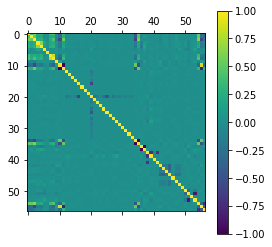

In [40]:
plt.matshow(X.corr())
cb = plt.colorbar()

In [43]:

f = plt.figure(figsize=(19, 15))
plt.matshow(features[['age_entry_years', 'sex', 'smoking', 'BMI', 'inc_ihd', 'acc.overall.avg']].corr(), fignum=f.number)
plt.xticks(range(features[['age_entry_years', 'sex', 'smoking', 'BMI', 'inc_ihd', 'acc.overall.avg']].select_dtypes(['number']).shape[1]), features[['age_entry_years', 'sex', 'smoking', 'BMI', 'inc_ihd', 'acc.overall.avg']].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(features[['age_entry_years', 'sex', 'smoking', 'BMI', 'inc_ihd', 'acc.overall.avg']].select_dtypes(['number']).shape[1]), features[['age_entry_years', 'sex', 'smoking', 'BMI', 'inc_ihd', 'acc.overall.avg']].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

0        24.20244
1        31.56829
2        31.81727
3        23.68884
4        18.83354
           ...   
99408    25.19081
99409    20.37041
99410    57.62625
99411    34.77740
99412    19.59079
Name: acc.overall.avg, Length: 99413, dtype: float64